In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, Model, load_model

In [ ]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_dir = '/content/drive/MyDrive/PlantVillage'

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE)
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
print("Class names:", class_names)

Class names: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [ ]:
len(dataset)

68

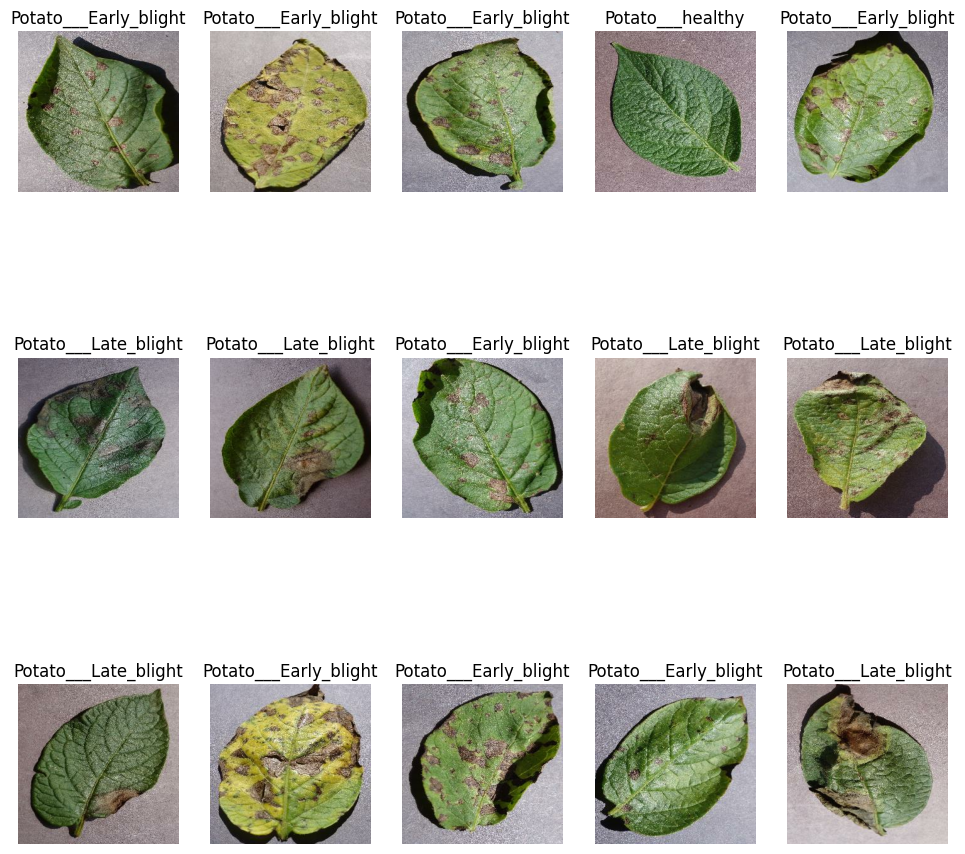

In [ ]:
plt.figure(figsize=(12,12))
for image_batch,label_batch in dataset.take(1):
    for i in range(15):
      ax= plt.subplot(3,5,i+1)
      plt.imshow(image_batch[i].numpy().astype('uint8'))
      plt.title(class_names[label_batch[i]])
      plt.axis("off")

In [ ]:
# 80% ==> Tranning
# 20% ==> 10% validation , 10% testing

In [ ]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds=dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds= dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions_tf( ds, train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size=len(ds)
  if shuffle :
    ds=ds.shuffle(shuffle_size ,seed=12)
  train_size=int(ds_size* train_split)
  valid_size=int(ds_size*val_split)

  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(valid_size)
  test_ds=ds.skip(train_size).skip(valid_size)

  return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
   layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
   layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation =tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(3,activation='softmax')


])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(train_ds,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=val_ds,verbose=1)

Epoch 1/50
54/54 [==============================] - 228s 4s/step - loss: 0.8993 - accuracy: 0.4983 - val_loss: 0.8382 - val_accuracy: 0.4896
Epoch 2/50
54/54 [==============================] - 210s 4s/step - loss: 0.6112 - accuracy: 0.7159 - val_loss: 0.2972 - val_accuracy: 0.9010
Epoch 3/50
54/54 [==============================] - 204s 4s/step - loss: 0.3679 - accuracy: 0.8501 - val_loss: 0.2267 - val_accuracy: 0.8958
Epoch 4/50
54/54 [==============================] - 208s 4s/step - loss: 0.3087 - accuracy: 0.8744 - val_loss: 0.1660 - val_accuracy: 0.9271
Epoch 5/50
54/54 [==============================] - 205s 4s/step - loss: 0.2177 - accuracy: 0.9132 - val_loss: 0.1551 - val_accuracy: 0.9271
Epoch 6/50
54/54 [==============================] - 207s 4s/step - loss: 0.1615 - accuracy: 0.9398 - val_loss: 0.2954 - val_accuracy: 0.8542
Epoch 7/50
54/54 [==============================] - 208s 4s/step - loss: 0.1250 - accuracy: 0.9514 - val_loss: 0.6895 - val_accuracy: 0.7812
Epoch 8/50
54

In [ ]:
scores= model.evaluate(test_ds)

8/8 [==============================] - 18s 973ms/step - loss: 0.0081 - accuracy: 1.0000


In [ ]:
scores

[0.008128375746309757, 1.0]

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.4982638955116272,
 0.7158564925193787,
 0.8501157164573669,
 0.8744212985038757,
 0.9131944179534912,
 0.9398148059844971,
 0.9513888955116272,
 0.9201388955116272,
 0.9600694179534912,
 0.9421296119689941,
 0.9658564925193787,
 0.9756944179534912,
 0.9849537014961243,
 0.9646990895271301,
 0.9785879850387573,
 0.9820601940155029,
 0.9646990895271301,
 0.9774305820465088,
 0.9809027910232544,
 0.984375,
 0.9814814925193787,
 0.9832175970077515,
 0.9739583134651184,
 0.9855324029922485,
 0.9890046119689941,
 0.9826388955116272,
 0.9803240895271301,
 0.984375,
 0.9924768805503845,
 0.9884259104728699,
 0.9901620149612427,
 0.9884259104728699,
 0.9890046119689941,
 0.9895833134651184,
 0.9861111044883728,
 0.9814814925193787,
 0.9924768805503845,
 0.9930555820465088,
 0.9907407164573669,
 0.9809027910232544,
 0.9895833134651184,
 0.9855324029922485,
 0.9878472089767456,
 0.9907407164573669,
 0.9849537014961243,
 0.9855324029922485,
 0.9947916865348816,
 0.9947916865348816,
 0.96875,
 0

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

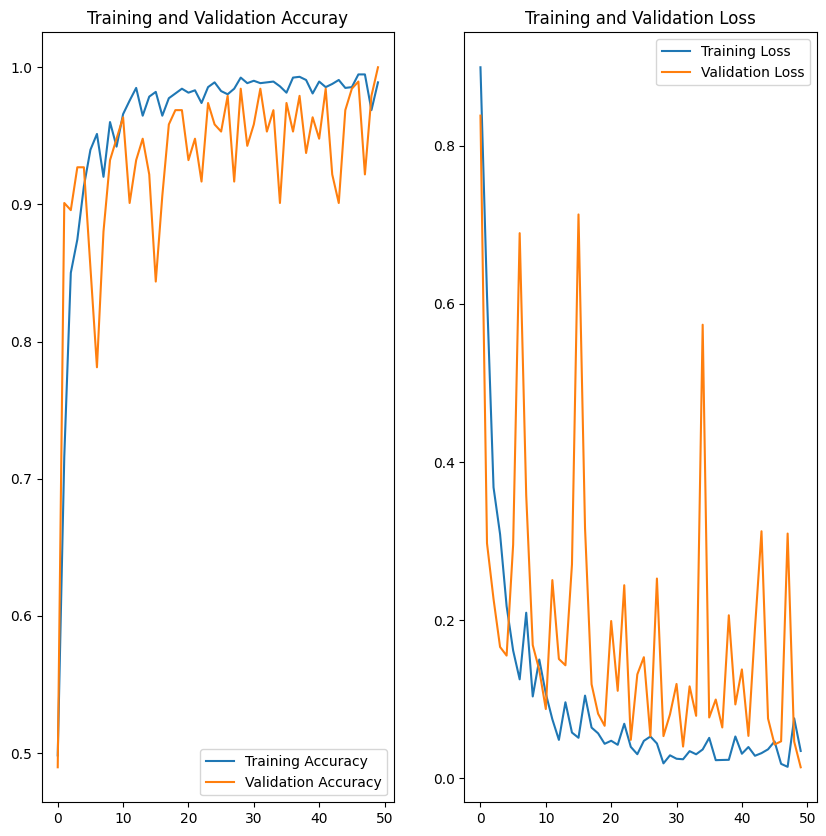

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuray')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss, label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to prediction
actual label  Potato___Early_blight
1/1 [==============================] - 1s 1s/step
Predication Potato___Early_blight


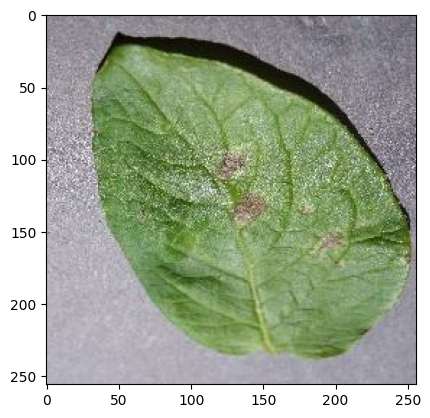

In [ ]:
for  images_batch,labels_batch in test_ds.take(1):
  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0].numpy()

  print("first image to prediction")
  plt.imshow(first_image)
  print("actual label ",class_names[first_label])
  image_pred=model.predict(images_batch)
  print("Predication",class_names[np.argmax(image_pred[0])])

In [ ]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)

  predictions=model.predict(img_array)

  predicted_class=class_names[np.argmax(predictions[0])]
  confidence= round(100*(np.max(predictions[0])),2)
  return predicted_class, confidence

1/1 [==============================] - 0s 77ms/step
Actual Prediction : Potato___Early_blight, 
  prediction: Potato___Early_blight,
 confidence 99.96 %
1/1 [==============================] - 0s 74ms/step
Actual Prediction : Potato___Late_blight, 
  prediction: Potato___Late_blight,
 confidence 99.85 %
1/1 [==============================] - 0s 67ms/step
Actual Prediction : Potato___Early_blight, 
  prediction: Potato___Early_blight,
 confidence 99.99 %
1/1 [==============================] - 0s 70ms/step
Actual Prediction : Potato___healthy, 
  prediction: Potato___healthy,
 confidence 99.82 %
1/1 [==============================] - 0s 82ms/step
Actual Prediction : Potato___Late_blight, 
  prediction: Potato___Late_blight,
 confidence 96.38 %
1/1 [==============================] - 0s 80ms/step
Actual Prediction : Potato___Early_blight, 
  prediction: Potato___Early_blight,
 confidence 100.0 %
1/1 [==============================] - 0s 68ms/step
Actual Prediction : Potato___Early_blight, 


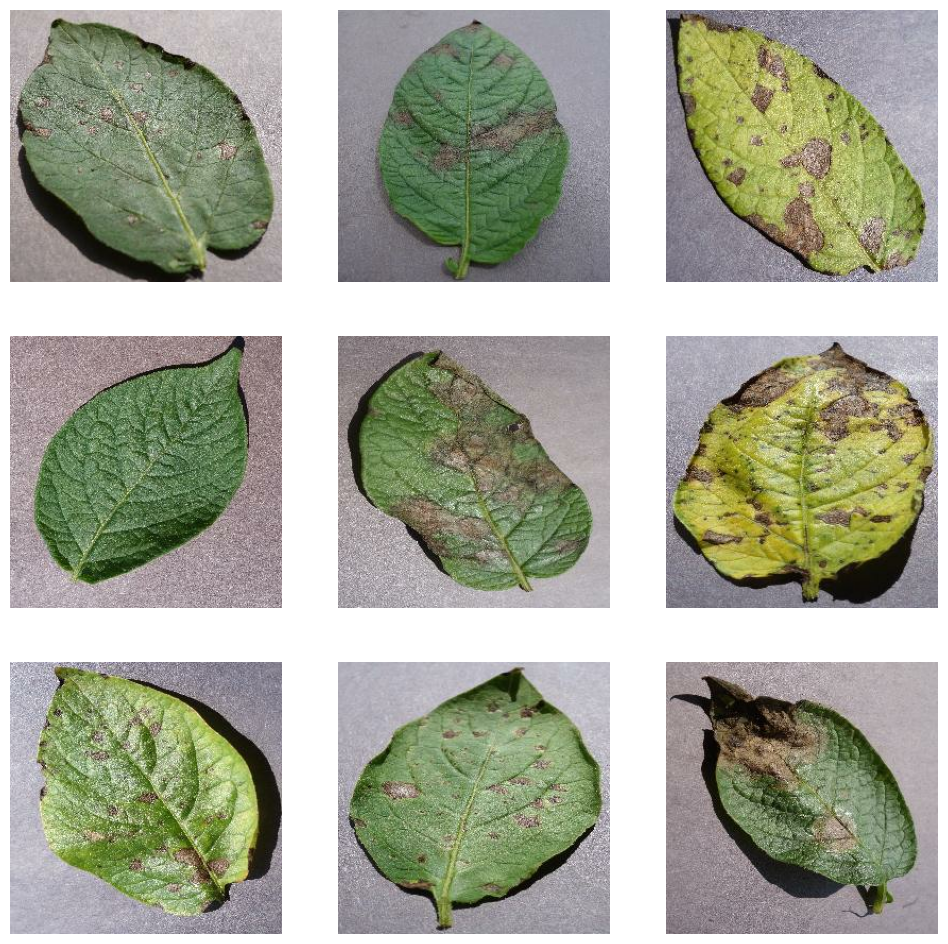

In [ ]:
plt.figure(figsize=(12,12))
for images ,labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class, confidence =predict(model,images[i].numpy())
    actual_class=class_names[labels[i]]
    print(f"Actual Prediction : {actual_class}, \n  prediction: {predicted_class},\n confidence {confidence} %")
    plt.axis("off")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
model=load_model("/content/drive/MyDrive/PlantVillage/potatoes.h5")

In [ ]:
from fastapi import FastAPI, File, UploadFile
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
from PIL import Image

In [ ]:
!pip install fastapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.4 MB/s eta 0:00:00


In [ ]:
app = FastAPI()
model = load_model('/content/drive/MyDrive/vgg19_epochs30_test98.h5')

In [ ]:
@app.post("/predict/")
async def predict(file: UploadFile = File(...)):

    img = Image.open(file.file)
    img = img.resize((256, 256))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)


    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    return {"predicted_class": predicted_class}

In [ ]:
!pip install python-multipart